In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

df = pd.read_csv('SampleDat.csv')

In [6]:
# Basic cleaning
df.drop_duplicates(inplace=True)  # Remove duplicates
df['body'] = df['body'].str.replace('â€™', "'")  # Fix encoding issues
df['subject'] = df['subject'].str.strip()  # Remove extra spaces

In [5]:
emails_per_sender = df['sender'].value_counts()
print("Top 5 senders:\n", emails_per_sender.head())

Top 5 senders:
 sender
alice@example.com      8
eve@startup.io         5
diana@client.co        5
charlie@partner.org    1
bob@customer.com       1
Name: count, dtype: int64


In [8]:
top_subjects = df['subject'].value_counts()
print("\nTop 5 subjects:\n", top_subjects.head())


Top 5 subjects:
 subject
Help required with account verification       5
General query about subscription              3
Immediate support needed for billing error    2
Urgent request: system access blocked         2
Critical help needed for downtime             2
Name: count, dtype: int64


In [9]:
all_words = ' '.join(df['body'].dropna()).lower().split()
common_words = Counter(all_words).most_common(10)
print("\nTop 10 common words in emails:\n", common_words)


Top 10 common words in emails:
 [('i', 13), ('you', 11), ('this', 11), ('my', 9), ('to', 8), ('is', 8), ('the', 7), ('integration', 6), ('am', 6), ('could', 6)]


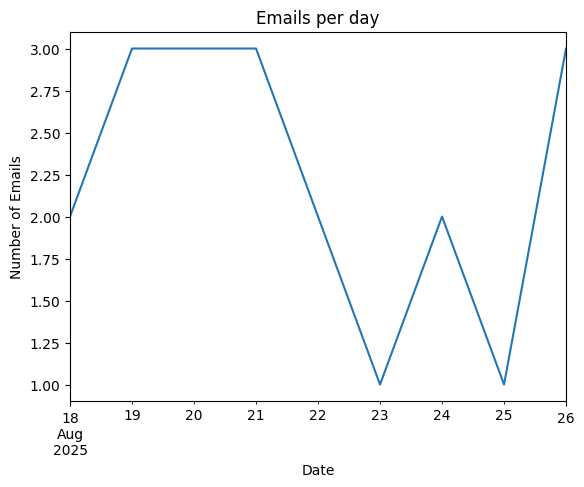

In [10]:
df['sent_date'] = pd.to_datetime(df['sent_date'], errors='coerce')
df.set_index('sent_date', inplace=True)
df.resample('D').size().plot(title='Emails per day')
plt.xlabel('Date')
plt.ylabel('Number of Emails')
plt.show()

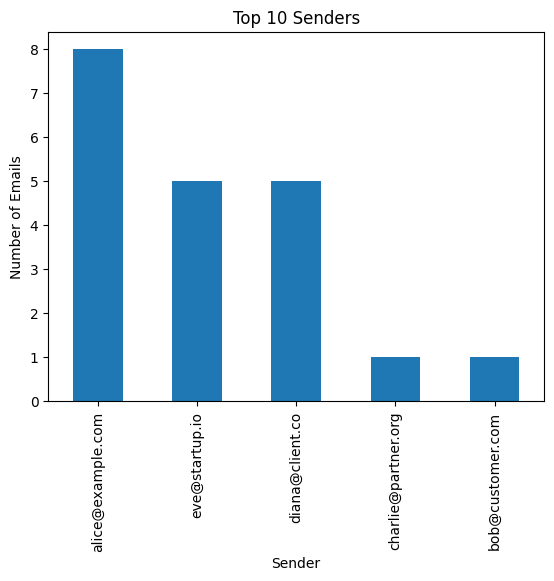

In [11]:
emails_per_sender.head(10).plot(kind='bar', title='Top 10 Senders')
plt.xlabel('Sender')
plt.ylabel('Number of Emails')
plt.show()

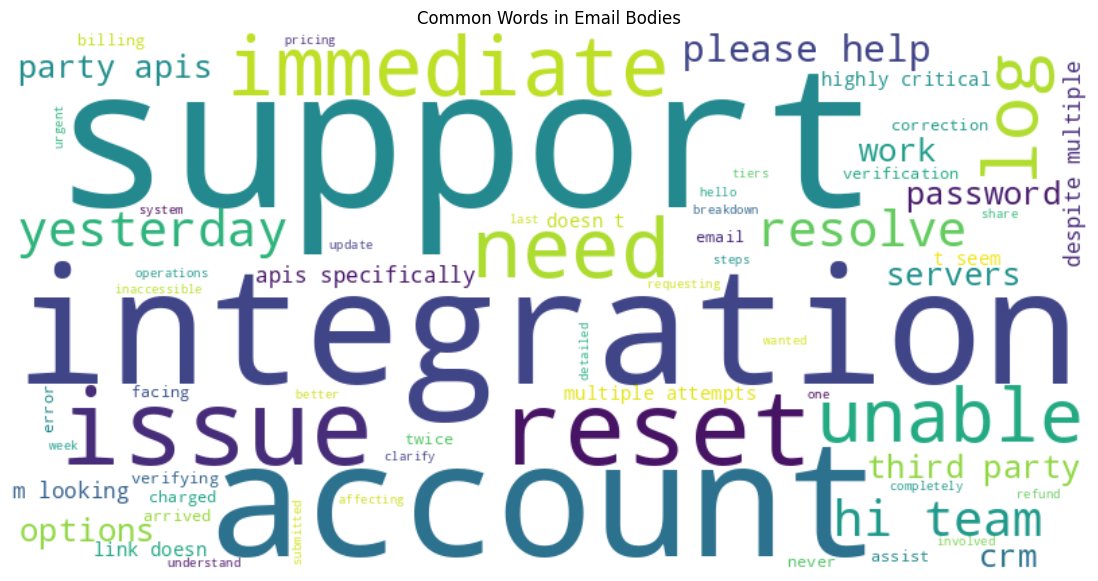

In [13]:
from wordcloud import WordCloud

text = ' '.join(df['body'].dropna().str.lower())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Common Words in Email Bodies')
plt.show()


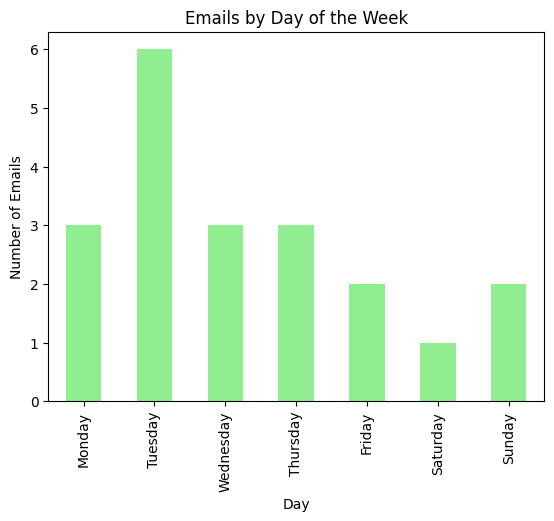

In [15]:
df['day_of_week'] = df.index.day_name()
df['day_of_week'].value_counts().reindex(
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
).plot(kind='bar', color='lightgreen', title='Emails by Day of the Week')
plt.xlabel('Day')
plt.ylabel('Number of Emails')
plt.show()


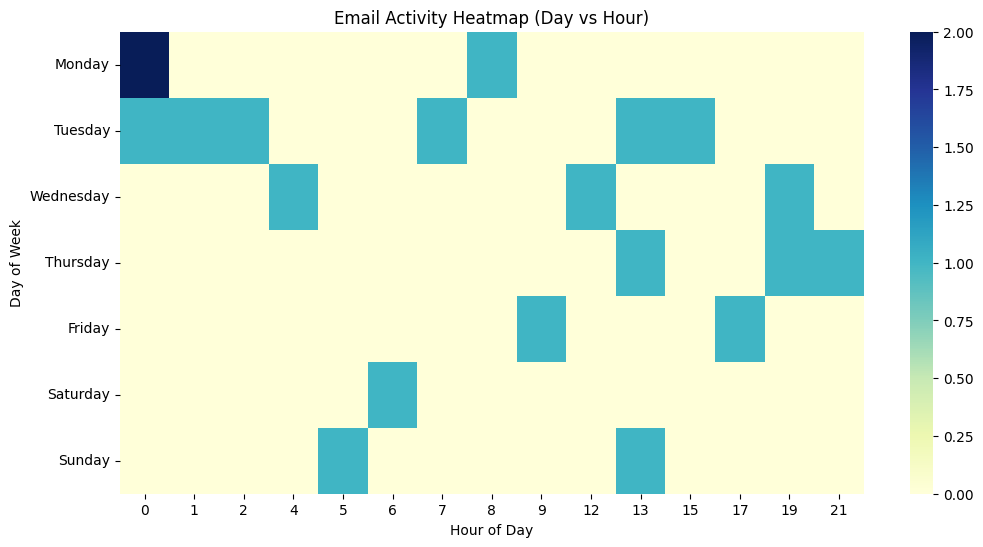

In [16]:
import seaborn as sns

df['hour'] = df.index.hour
heatmap_data = df.groupby(['day_of_week','hour']).size().unstack(fill_value=0)
# Reorder days
heatmap_data = heatmap_data.reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data, cmap='YlGnBu')
plt.title('Email Activity Heatmap (Day vs Hour)')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.show()
